Loading Fashion-MNIST for ResNet-18...


100%|██████████| 26.4M/26.4M [00:01<00:00, 21.1MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 338kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 6.23MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 10.4MB/s]



--- Starting Training: Model 2 (ResNet-18) ---
Epoch 1/5 - Training Loss: 0.4372
Epoch 2/5 - Training Loss: 0.2858
Epoch 3/5 - Training Loss: 0.2294
Epoch 4/5 - Training Loss: 0.1933
Epoch 5/5 - Training Loss: 0.1571

Final Test Accuracy of ResNet-18: 89.47%


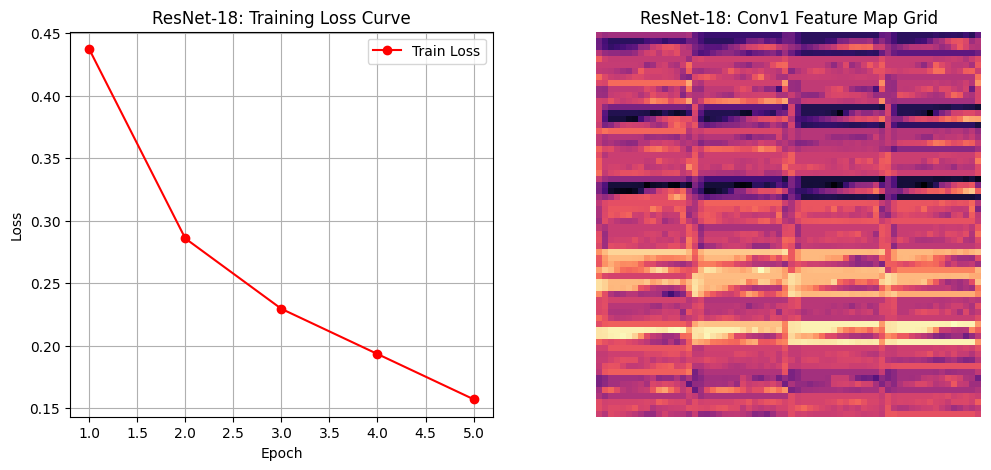

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, datasets, transforms
import matplotlib.pyplot as plt

# --- Phase 1: Data Preparation ---
# Resizing to 32x32 for ResNet architecture compatibility [cite: 128, 171]
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

print("Loading Fashion-MNIST for ResNet-18...")
trainset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# --- Phase 2: Model Modification (Model 2 - ResNet-18) [cite: 125-132] ---
model_resnet = models.resnet18(weights=None)
# Modifying for 1-channel Grayscale input [cite: 129]
model_resnet.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
# Modifying for 10-class output
model_resnet.fc = nn.Linear(model_resnet.fc.in_features, 10)

criterion = nn.CrossEntropyLoss()
# Using Adam optimizer with lr=0.0001 for stability [cite: 132, 134]
optimizer = optim.Adam(model_resnet.parameters(), lr=0.0001)

# --- Phase 3: Training Phase (5 Epochs) [cite: 134, 138] ---
resnet_losses = []
print("\n--- Starting Training: Model 2 (ResNet-18) ---")
model_resnet.train()
for epoch in range(5):
    running_loss = 0.0
    for inputs, labels in trainloader:
        optimizer.zero_grad()
        outputs = model_resnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_epoch_loss = running_loss/len(trainloader)
    resnet_losses.append(avg_epoch_loss)
    print(f"Epoch {epoch + 1}/5 - Training Loss: {avg_epoch_loss:.4f}")

# --- Phase 4: Evaluation (Test Accuracy) [cite: 102] ---
model_resnet.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        outputs = model_resnet(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'\nFinal Test Accuracy of ResNet-18: {100 * correct / total:.2f}%')

# --- Phase 5: Visualizations (Comparison and Deep Visualization) [cite: 167-183] ---
plt.figure(figsize=(12, 5))

# Plotting the Training Loss Curve
plt.subplot(1, 2, 1)
plt.plot(range(1, 6), resnet_losses, 'r-o', label='Train Loss')
plt.title("ResNet-18: Training Loss Curve")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend(); plt.grid(True)

# Feature Map Grid for ResNet Analysis [cite: 152, 161]
def visualize_resnet_activations(model, loader):
    images, _ = next(iter(loader))
    sample_img = images[0].unsqueeze(0)
    with torch.no_grad():
        feature_maps = model.conv1(sample_img) # Modified initial conv layer

    plt.subplot(1, 2, 2)
    # Displaying a grid of learned features
    grid_data = feature_maps[0, :16].cpu().numpy()
    plt.imshow(grid_data.reshape(4*16, 4*16), cmap='magma')
    plt.title("ResNet-18: Conv1 Feature Map Grid")
    plt.axis('off')
    plt.show()

visualize_resnet_activations(model_resnet, testloader)